# 0. 安装必要的库，这里已经显示安装好

In [1]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
# !pip install rdkit
# !pip install padelpy
# !pip install pymatgen
# !pip install matminer
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

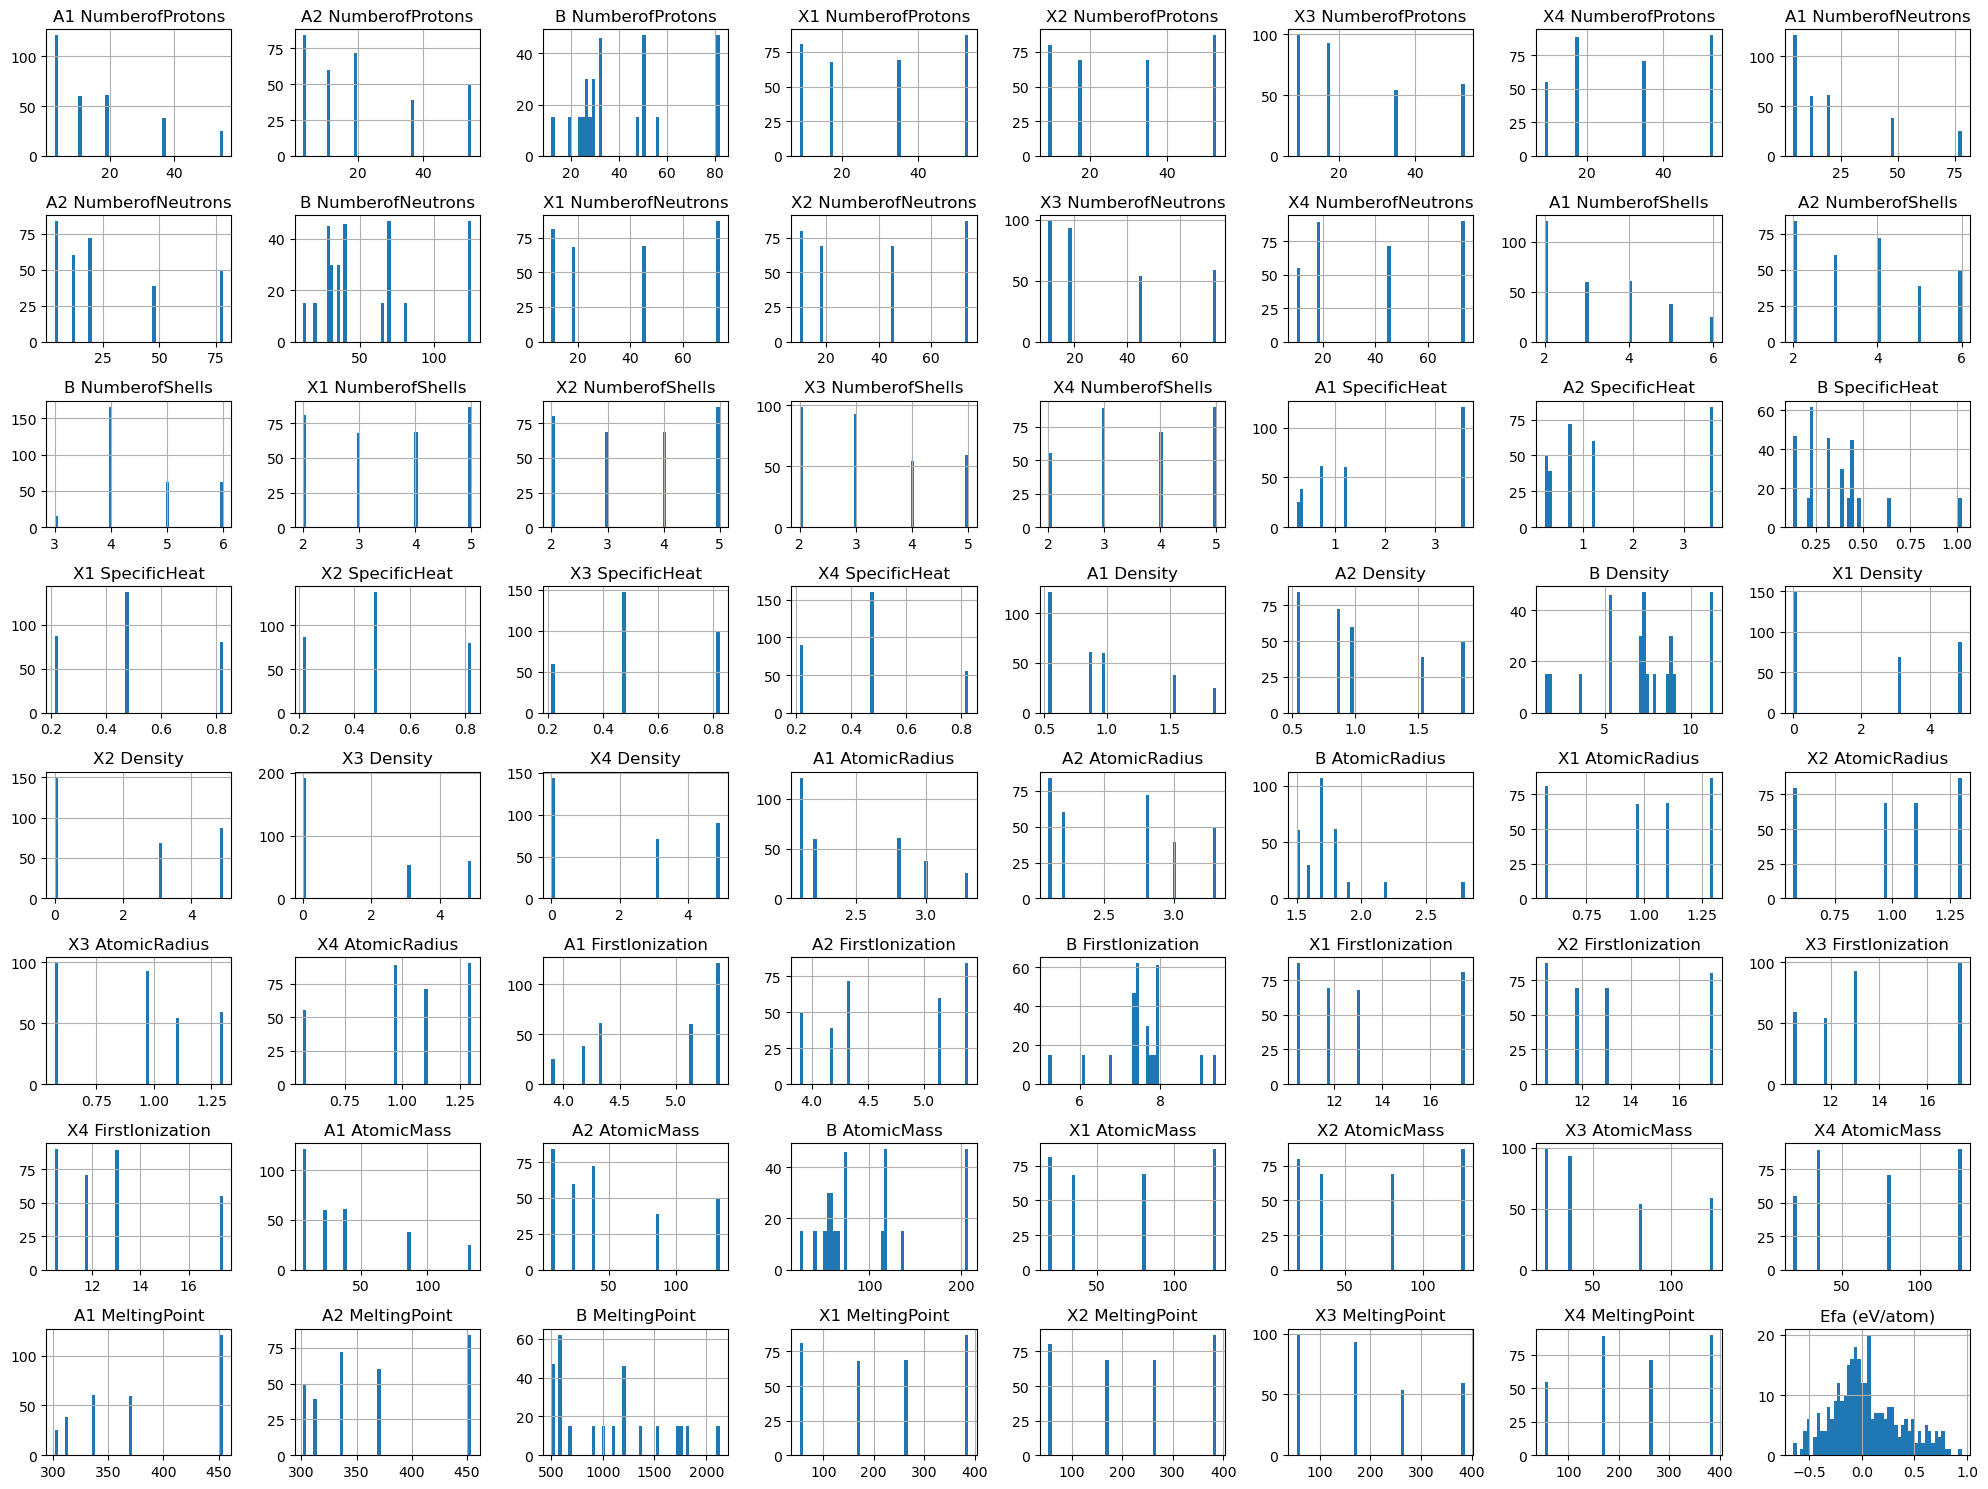

In [2]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

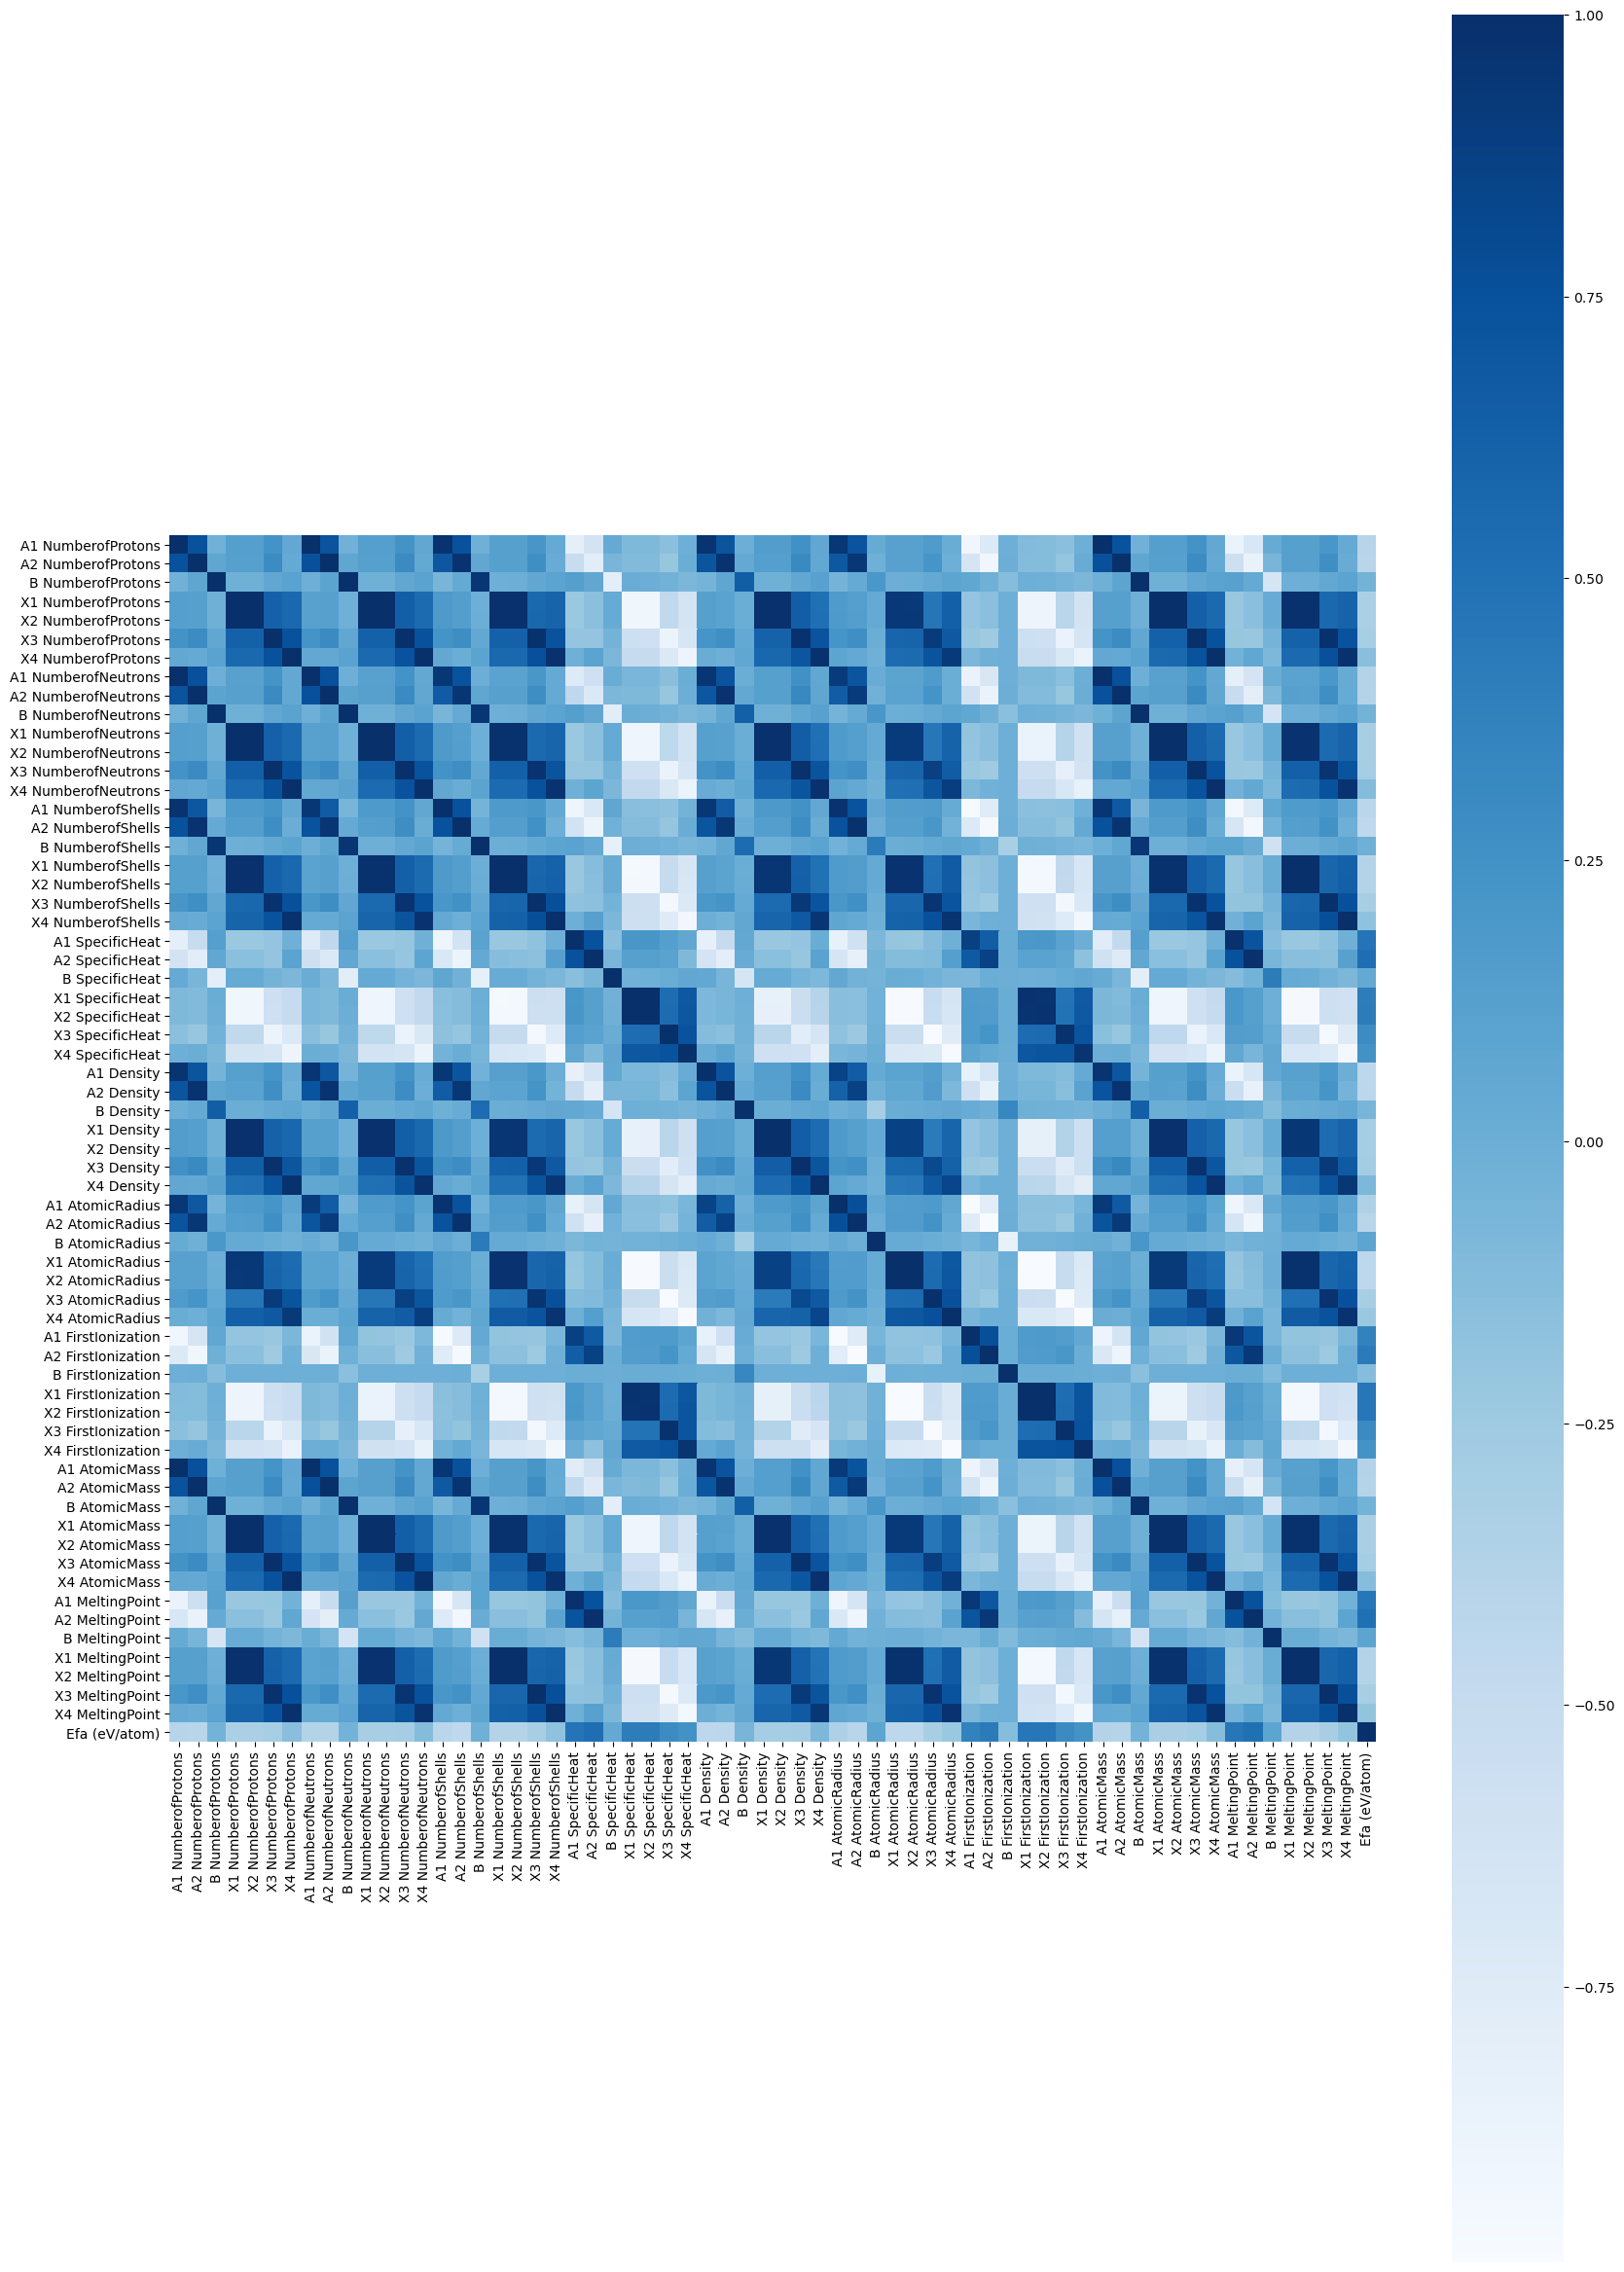

In [3]:
dataML.heatmap_before() #画特征选择之前的总eatmap热图

# 3. rfe特征选择

In [4]:
dataML.feature_rfe_select1(23)   #20为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False  True  True False  True  True False False  True False False False
 False  True False False False False  True False  True False  True  True
 False  True False  True  True  True  True False False False False False
 False False False False False False  True  True  True False  True False
 False False  True False False  True False False False  True  True False
 False False False]
获取的数据特征尺寸: (305, 23)
最后的特征s_rfe: ['A2 NumberofProtons' 'B NumberofProtons' 'X2 NumberofProtons'
 'X3 NumberofProtons' 'A2 NumberofNeutrons' 'X4 NumberofNeutrons'
 'X2 NumberofShells' 'X4 NumberofShells' 'A2 SpecificHeat'
 'B SpecificHeat' 'X2 SpecificHeat' 'X4 SpecificHeat' 'A1 Density'
 'A2 Density' 'B Density' 'A1 FirstIonization' 'A2 FirstIonization'
 'B FirstIonization' 'X2 FirstIonization' 'A2 AtomicMass' 'X2 AtomicMass'
 'A2 MeltingPoint' 'B MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..            

# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

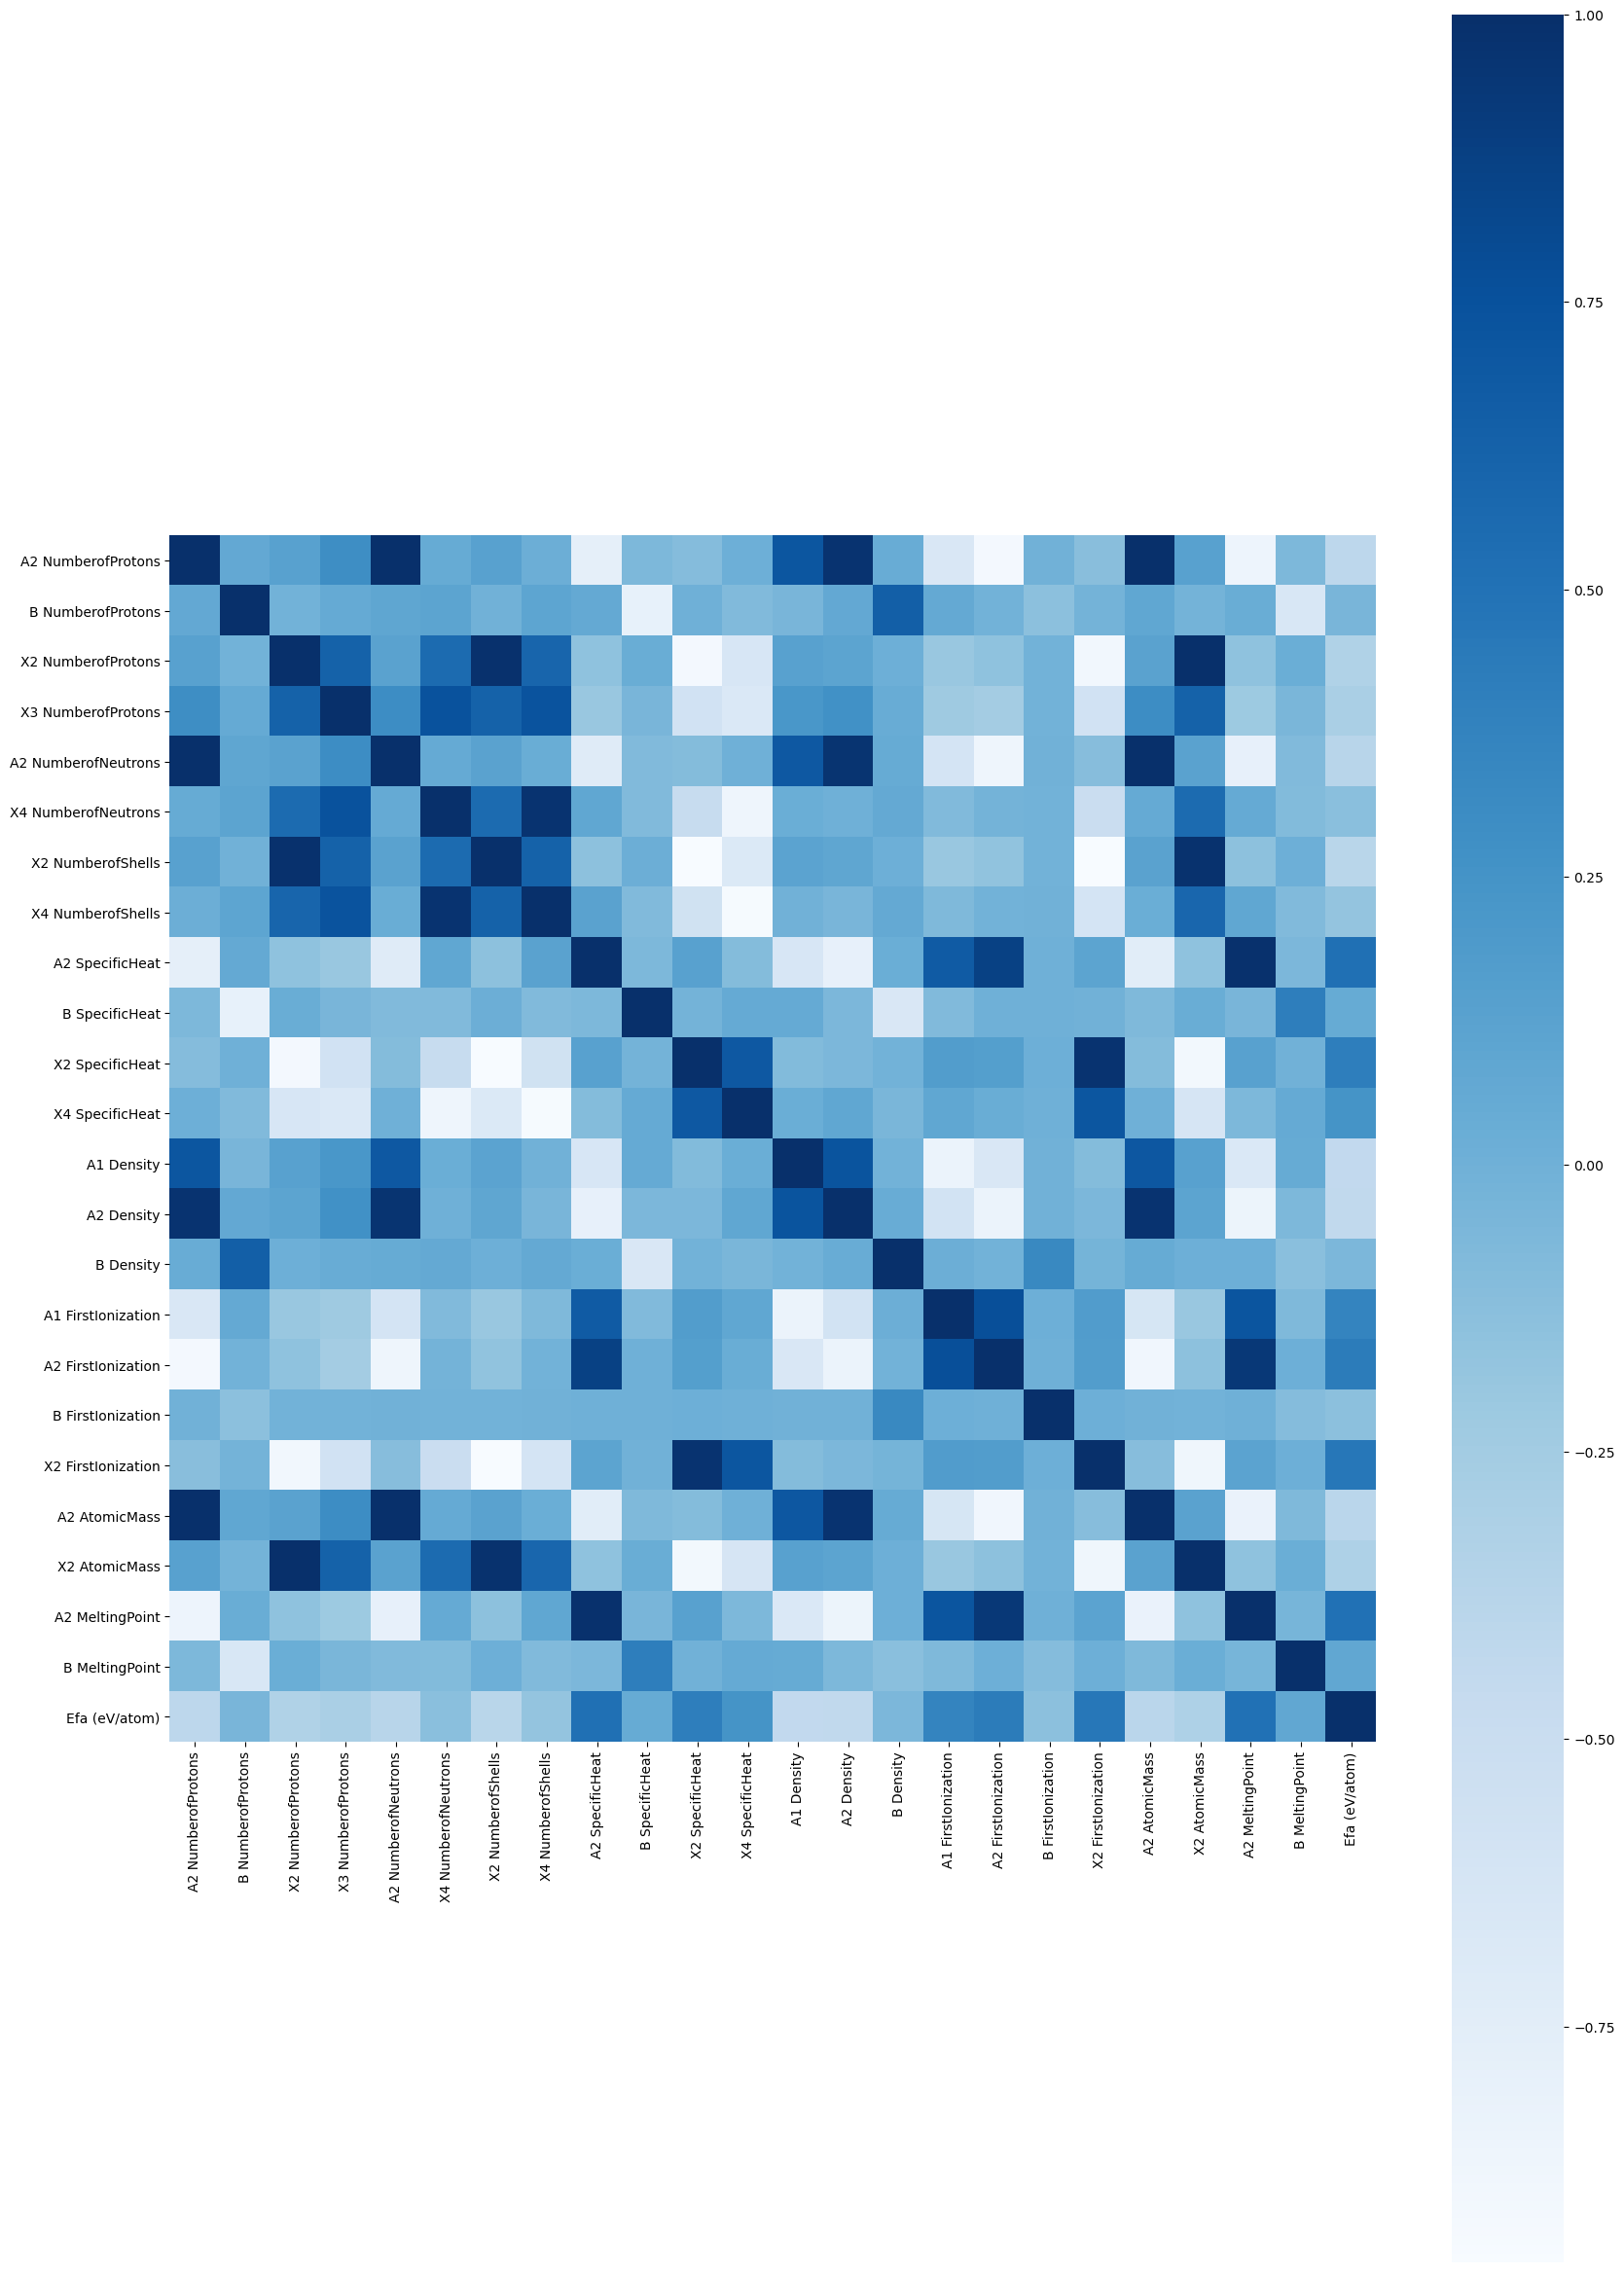

In [5]:
dataML.heatmap_afterRFE() 

In [6]:
# dataML.pairplot_afterRFE()#这里画图需要较长时间，请耐心

这个图可以提取科学信息

正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
A1 SpecificHeat,0.475211
X2 FirstIonization,0.462445
A1 MeltingPoint,0.459693
...,...
A2 Density,-0.431418
X1 AtomicRadius,-0.436009
A1 Density,-0.437098
X2 AtomicRadius,-0.439406


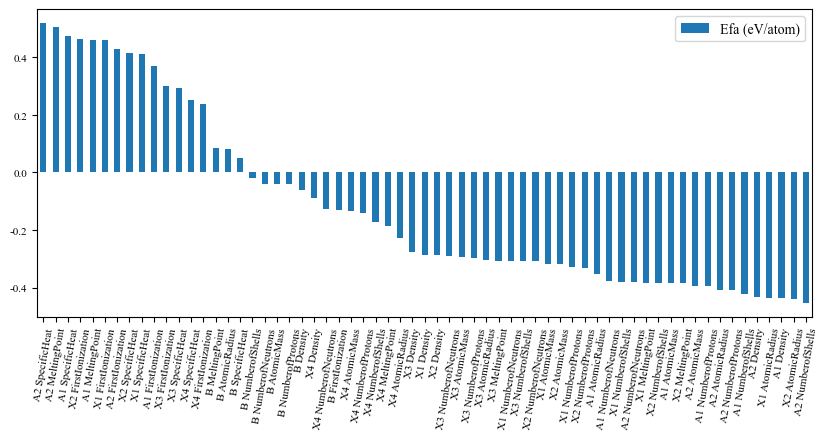

In [7]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
X2 FirstIonization,0.462445
A2 FirstIonization,0.429791
X2 SpecificHeat,0.415926
A1 FirstIonization,0.369538
X4 SpecificHeat,0.251342
B MeltingPoint,0.083589
B SpecificHeat,0.048594
B NumberofProtons,-0.041833


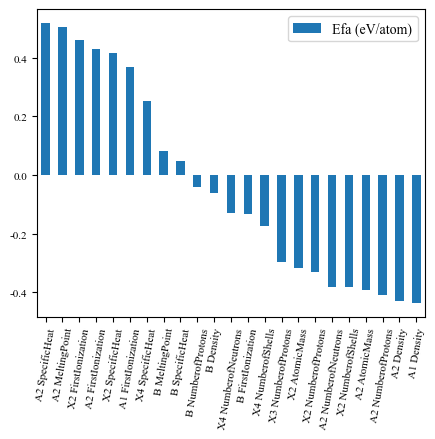

In [8]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

RMSE: 0.17127717542337956
MAE: 0.10993143334098217
R2: 0.6878075371371135
MSE: 0.02933587082101113


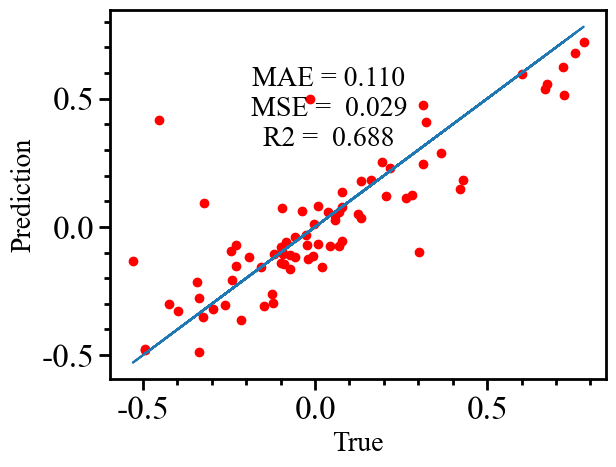

[0.34197227 0.47404185 0.57241635 0.70559368 0.45778025 0.82320839
 0.87882155 0.74990512 0.81127783 0.58197662]


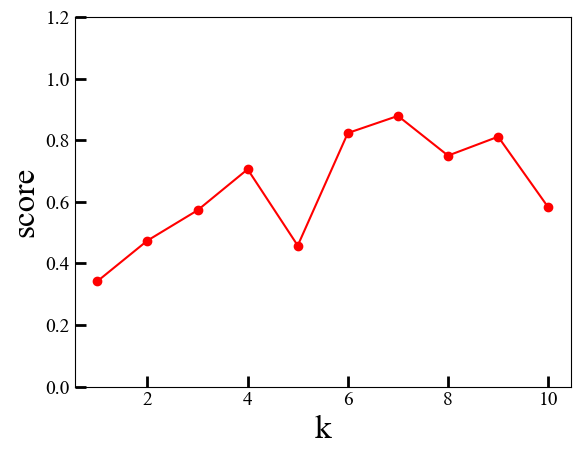

RMSE: 0.000789633431666008
MAE: 0.0005815052606188059
R2: 0.9999941396052683
MSE: 6.235209564046362e-07


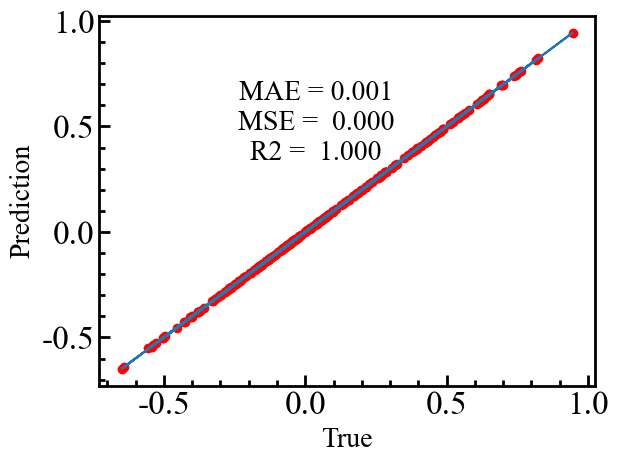

In [9]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

RMSE: 0.16978945504328788
MAE: 0.10352340245188625
R2: 0.693207415441375
MSE: 0.028828459043896672


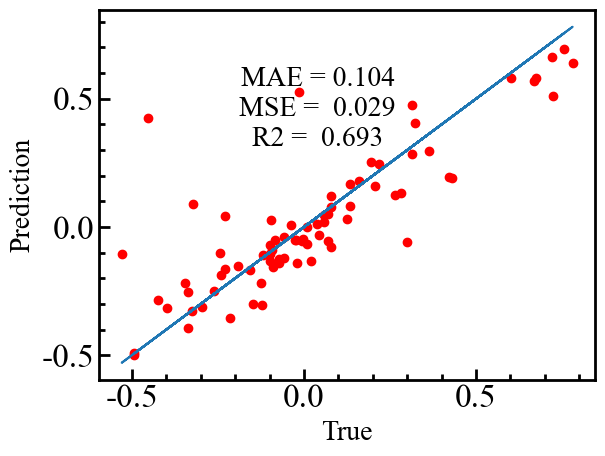

[0.3859866  0.41644277 0.53268229 0.6631093  0.50071396 0.82367144
 0.88222075 0.75015194 0.78385361 0.58265404]


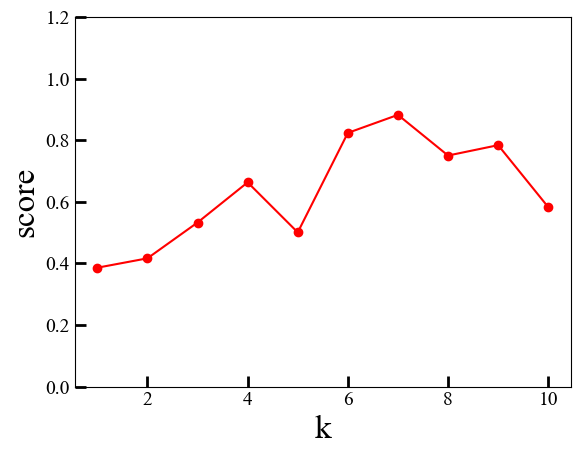

RMSE: 0.0008612584976177857
MAE: 0.0006318098681125551
R2: 0.9999930282331582
MSE: 7.417661997188453e-07


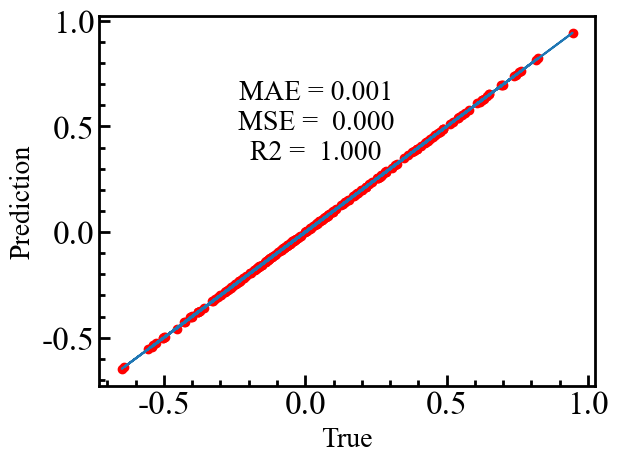

In [10]:
dataML.xgboost_modify(2000,200,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

RMSE: 0.1721669862723663
MAE: 0.11644398107251357
R2: 0.6845553369988855
MSE: 0.02964147116210916


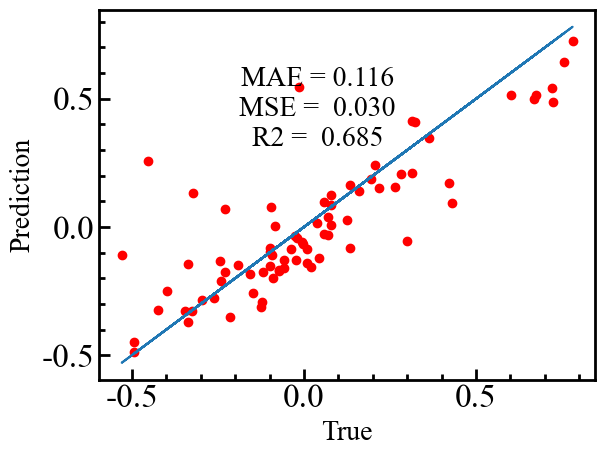

Exception ignored in: <function Booster.__del__ at 0x0000002196BE61F0>
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 1513, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
KeyboardInterrupt: 


In [ ]:
dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，请耐心等待
        #         "n_estimators": [100, 200, 300, 400, 500],
        #         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        #         'learning_rate': [0.01, 0.05, 0.1],
        #         'subsample': [0.6, 0.8, 1.0],
        #         'colsample_bytree': [0.6, 0.8, 1.0],
        #         'min_child_weight': [1, 5, 10],
        #         'gamma': [0.5, 1, 1.5, 2, 5],
        #         "objective": "multi:softmax",
        #         "aplha": [0, 2, 4, 6, 8]

### 6.1.4 xgboost SearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [12]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数与RandomSearch一样，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

RMSE: 0.1797258630563108
MAE: 0.1190980871512987
R2: 0.6562485134891477
MSE: 0.03230138585133578


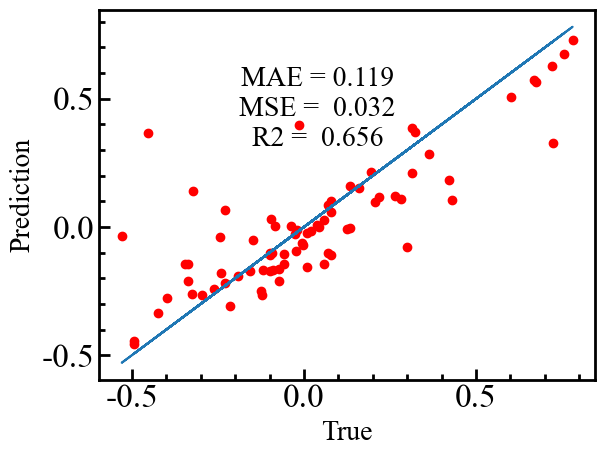

[0.57794251 0.48396638 0.52365631 0.64603712 0.39539457 0.75063048
 0.9206685  0.81330174 0.8591471  0.47070584]


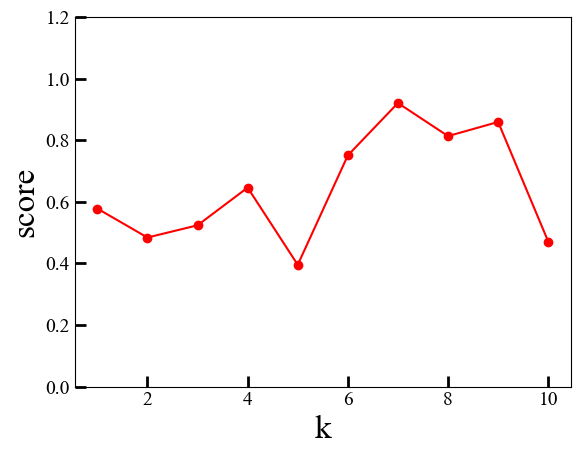

RMSE: 0.06409550254831008
MAE: 0.04519486425109648
R2: 0.9613872326153513
MSE: 0.004108233446920424


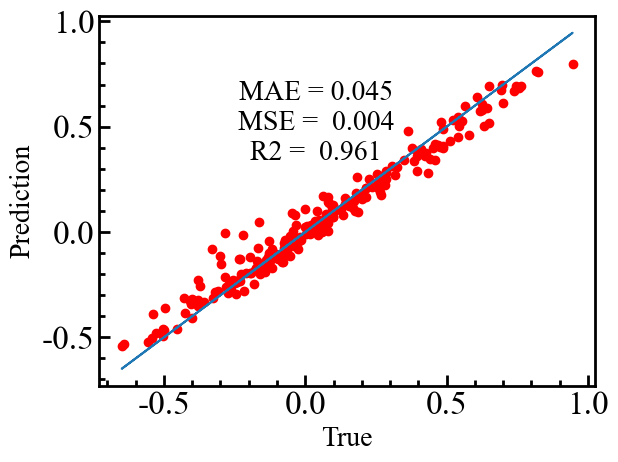

In [13]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.2.2 Random forest 自己修改超参数建模画图

RMSE: 0.19153386460512797
MAE: 0.13731851064935066
R2: 0.6095957179777349
MSE: 0.0366852212905755


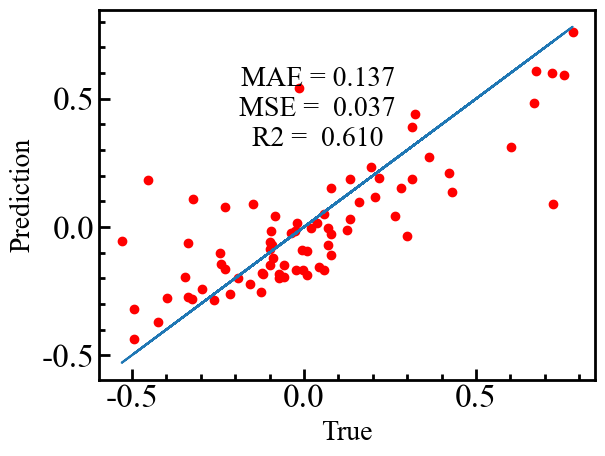

[0.53753327 0.39483556 0.55859864 0.71101041 0.31647527 0.78203983
 0.85367794 0.83298809 0.79960657 0.52717314]


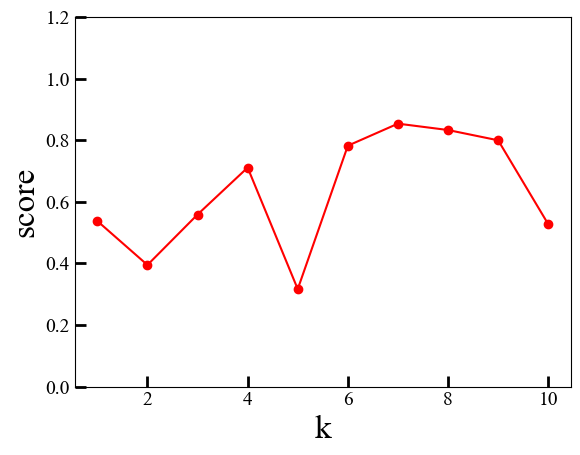

RMSE: 0.07819783650005555
MAE: 0.04793327609298245
R2: 0.9425268117314011
MSE: 0.006114901633289419


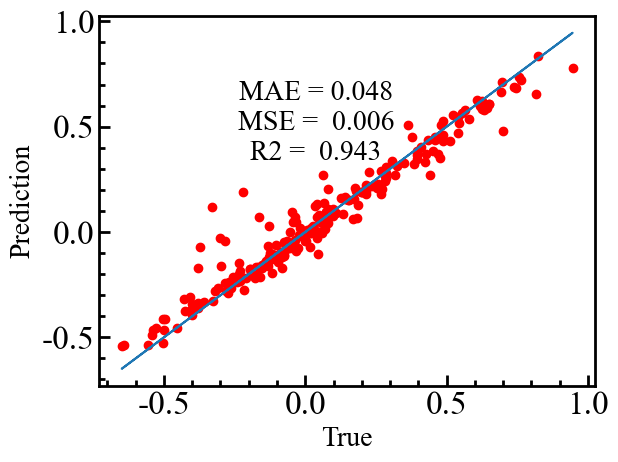

In [14]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [15]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

RMSE: 0.17283926272975025
MAE: 0.11412186574025975
R2: 0.6820870350077921
MSE: 0.029873410740963637


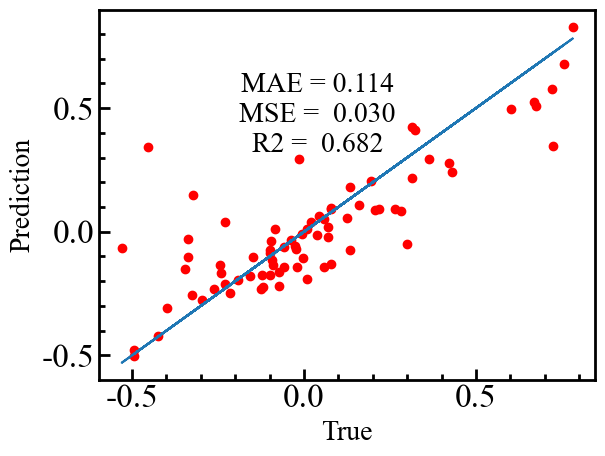

[0.5446735  0.45946034 0.53054019 0.66902203 0.47726788 0.72137524
 0.9064532  0.78308211 0.78482429 0.36666696]


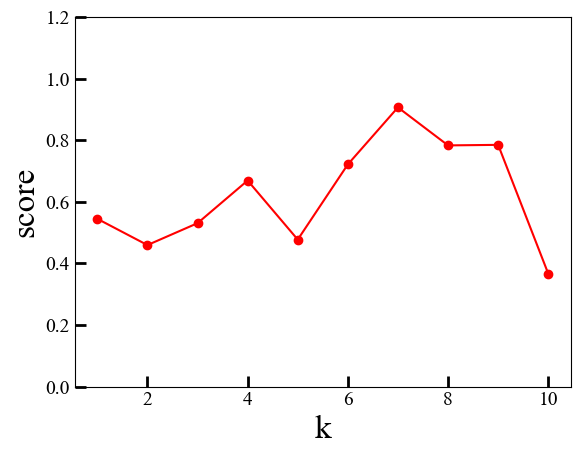

RMSE: 0.07635520804300229
MAE: 0.05028569329561403
R2: 0.9452034590625832
MSE: 0.005830117795290162


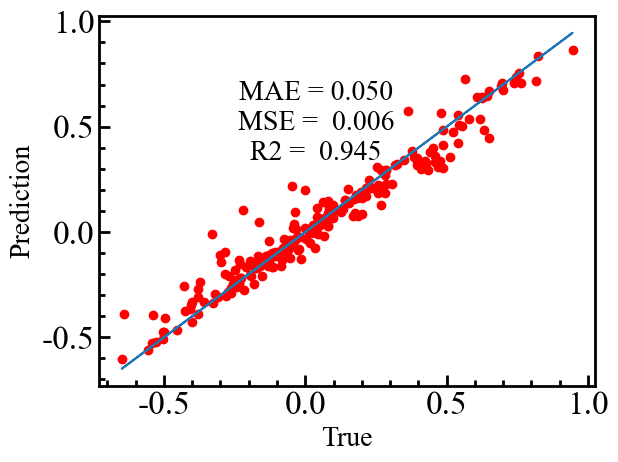

In [16]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

RMSE: 0.1966526931757634
MAE: 0.1545021282233428
R2: 0.5884494122399376
MSE: 0.03867228173328094


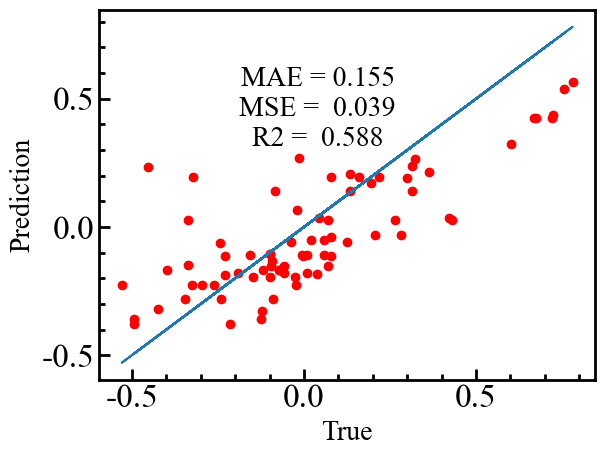

[0.49490398 0.48704735 0.32062972 0.50487686 0.40748424 0.68163318
 0.82466788 0.65375297 0.73670103 0.51587905]


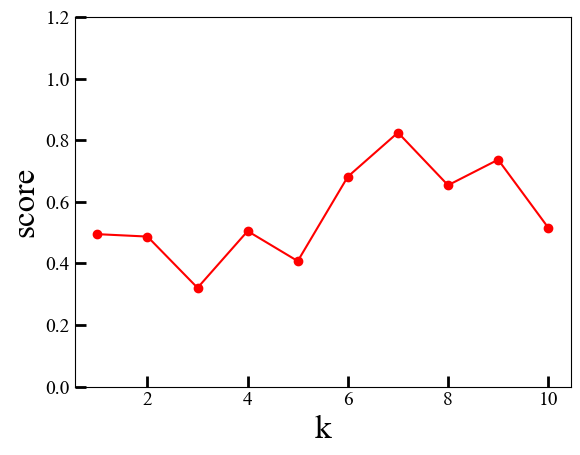

RMSE: 0.15419298155370406
MAE: 0.12875855389937646
R2: 0.7765373075470909
MSE: 0.02377547556042092


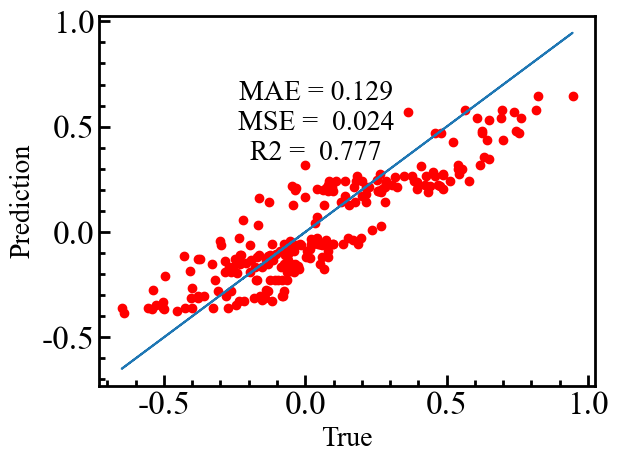

In [17]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

RMSE: 0.18606545812555725
MAE: 0.12333358791916613
R2: 0.6315700369947174
MSE: 0.0346203547074735


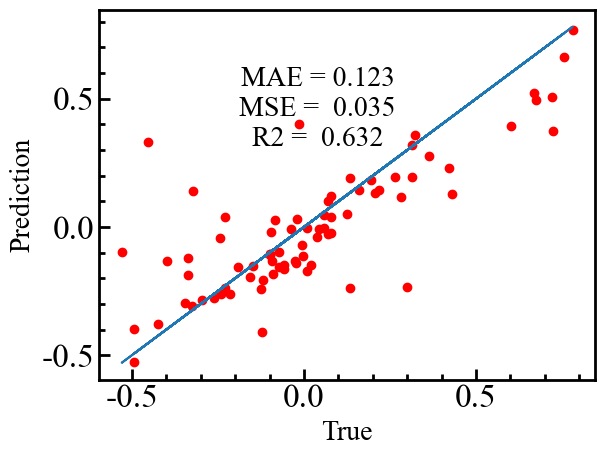

[0.5634871  0.58498321 0.59028188 0.68644266 0.51834005 0.70895495
 0.93089158 0.85137261 0.62810164 0.43347983]


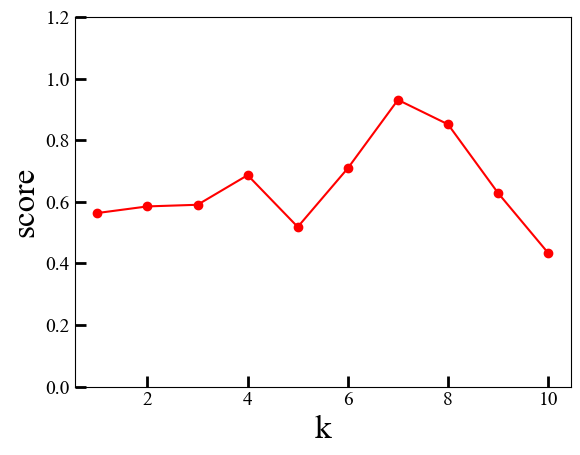

RMSE: 0.09108365666385598
MAE: 0.0647953614132012
R2: 0.9220247582652973
MSE: 0.008296232511259195


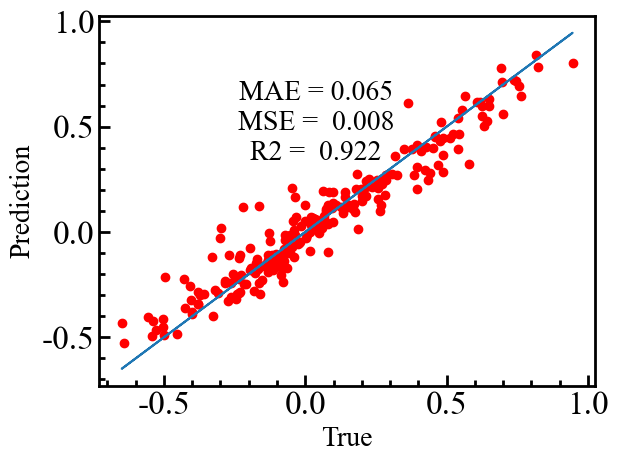

In [18]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

RMSE: 0.22211553523921285
MAE: 0.1422329872857143
R2: 0.4749734091929584
MSE: 0.049335310994602005


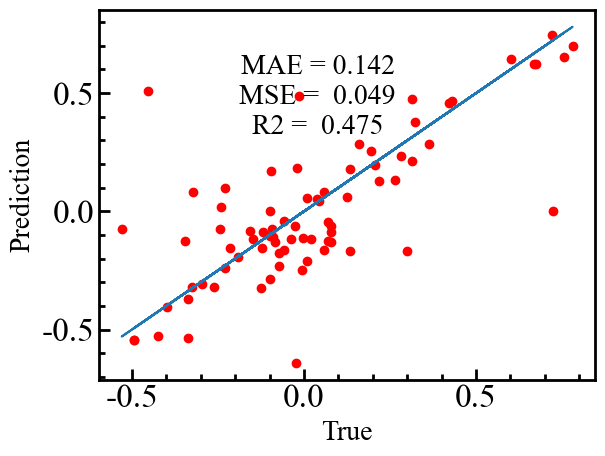

[0.41488992 0.23167414 0.24484967 0.31543945 0.47944693 0.73567108
 0.57577377 0.69482698 0.42272216 0.41031911]


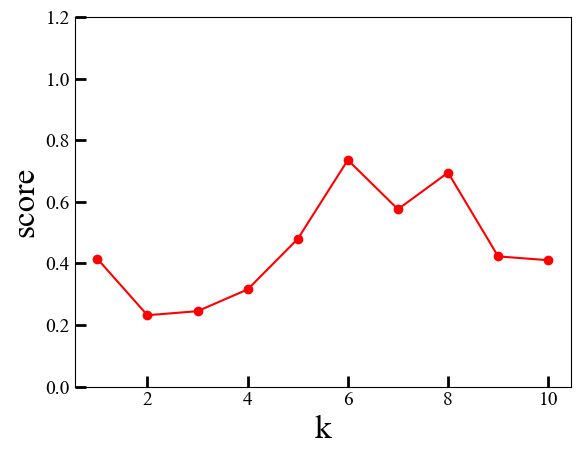

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


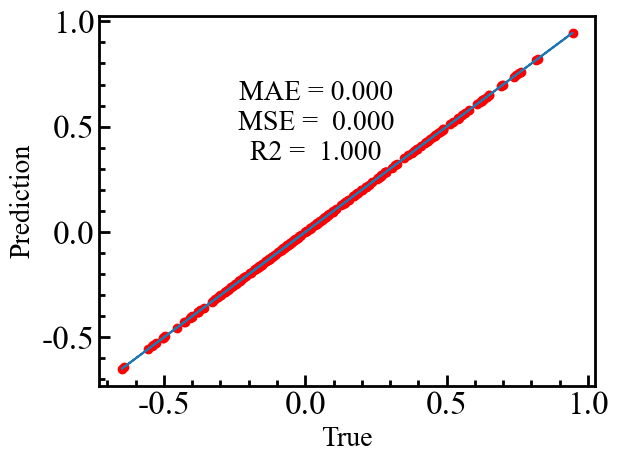

In [19]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

RMSE: 0.21434598280426456
MAE: 0.14915677043921097
R2: 0.5110616232504035
MSE: 0.04594420034432608


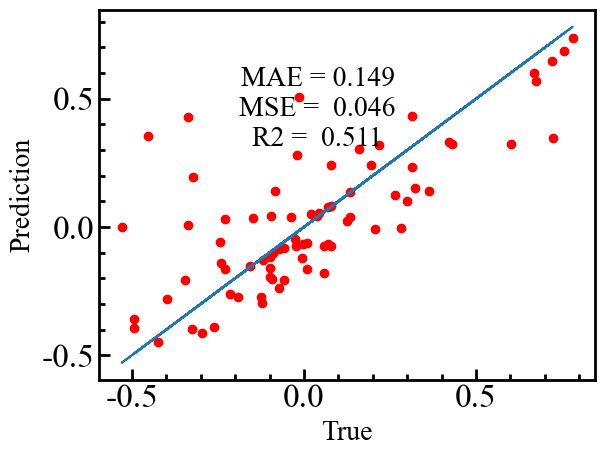

[0.49775839 0.30145445 0.48805116 0.69779094 0.2597361  0.72697063
 0.75442824 0.5474697  0.74222819 0.28607595]


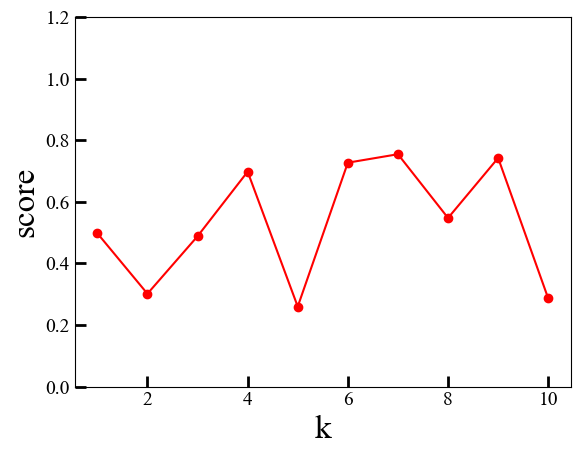

RMSE: 0.16378360446285364
MAE: 0.1094773669966189
R2: 0.7478745630537751
MSE: 0.026825069090844488


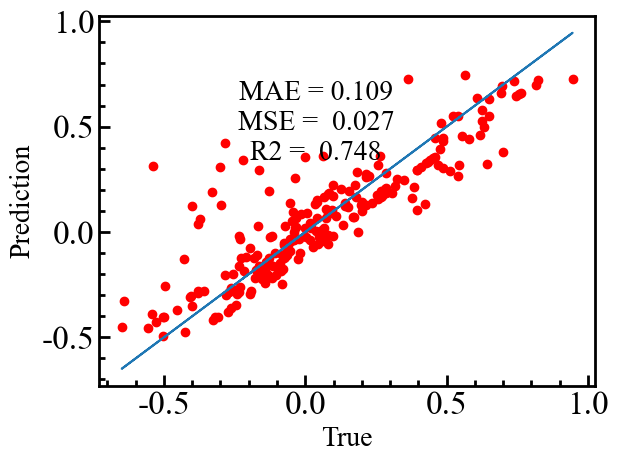

In [20]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

RMSE: 0.22157376310119925
MAE: 0.14090821842857143
R2: 0.47753151821662154
MSE: 0.04909493249482636


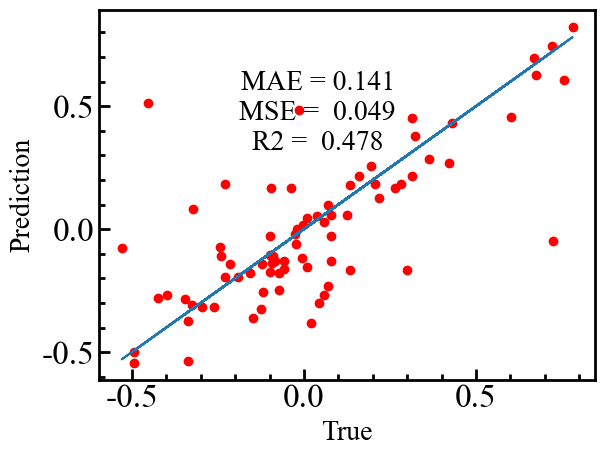

[0.38654381 0.32338794 0.37636166 0.31956112 0.46827032 0.56135142
 0.81186074 0.69889004 0.32206185 0.2383082 ]


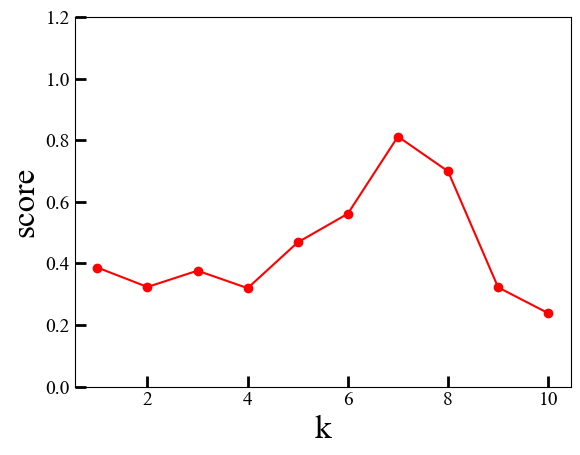

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


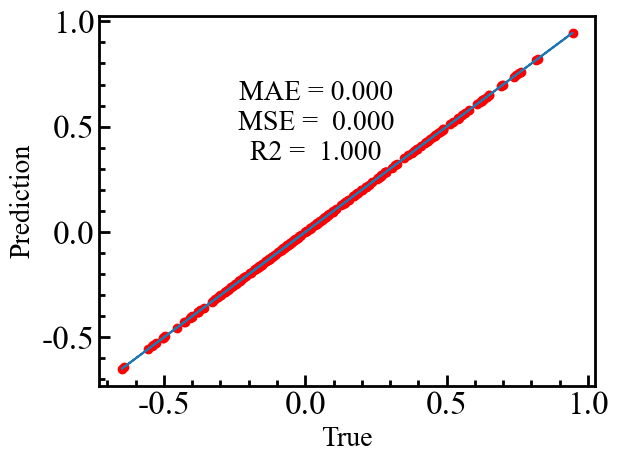

In [21]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


RMSE: 830807958.6592094
MAE: 94679354.06316672
R2: -7.345556873410646e+18
MSE: 6.902418641714825e+17


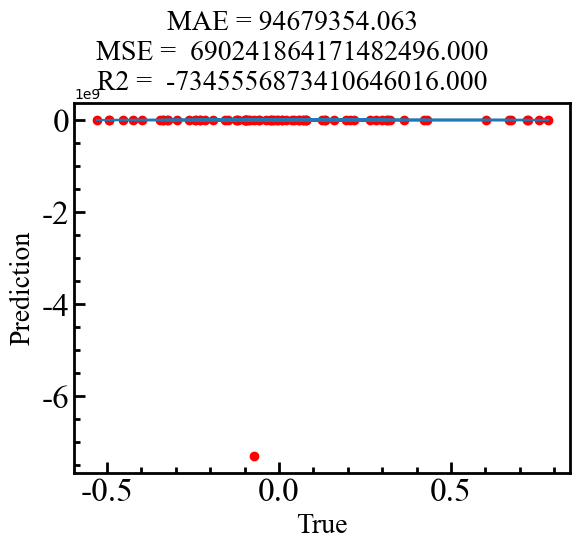

[0.54917181 0.46106374 0.48073697 0.59990364 0.25138779 0.59729727
 0.72433294 0.56568816 0.77951497 0.50586306]


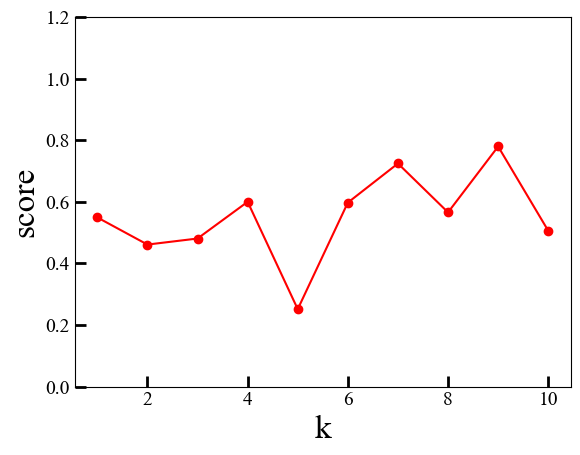

RMSE: 0.1939673263389709
MAE: 0.14557680617083846
R2: 0.6463831316947448
MSE: 0.03762332368708883


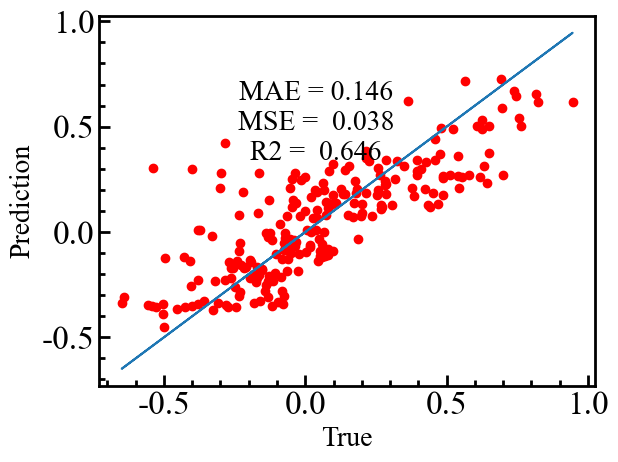

In [22]:
dataML.LinearRegression_default()

In [23]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

RMSE: 0.2297885953350551
MAE: 0.17145160323309314
R2: 0.43807239182619173
MSE: 0.052802798546057704


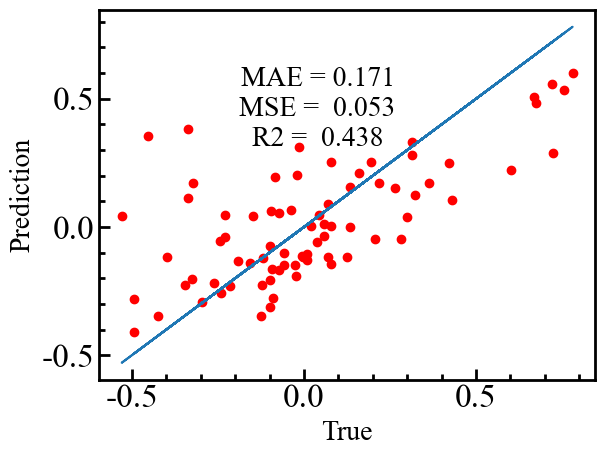

[0.53724576 0.37931239 0.44801944 0.64697024 0.30619159 0.57167164
 0.73172294 0.56617645 0.78154551 0.52946837]


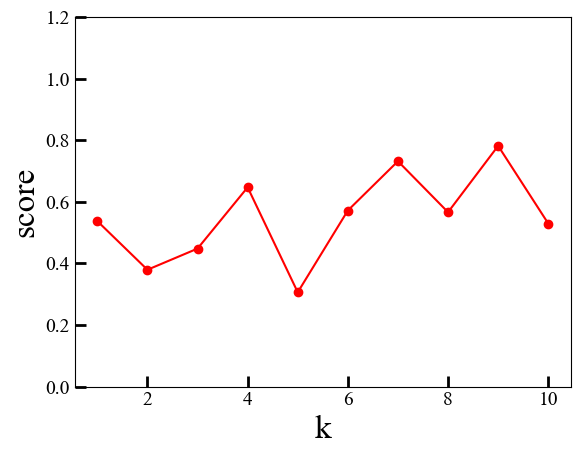

RMSE: 0.19788980870756243
MAE: 0.15072167749813378
R2: 0.6319365674343492
MSE: 0.039160376390315645


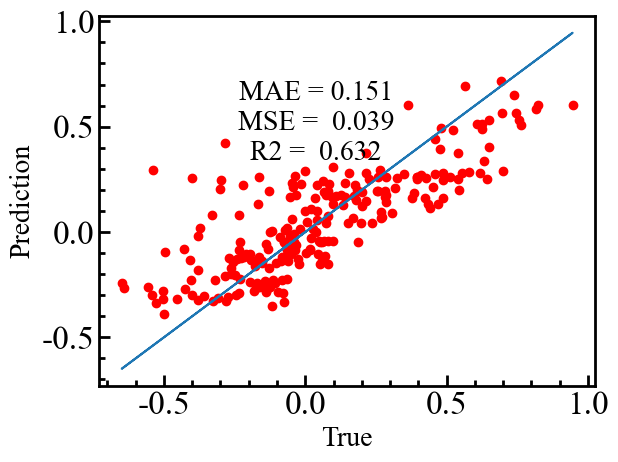

In [24]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

RMSE: 0.217654113314735
MAE: 0.1500831118342637
R2: 0.49585299979501973
MSE: 0.0473733130428235


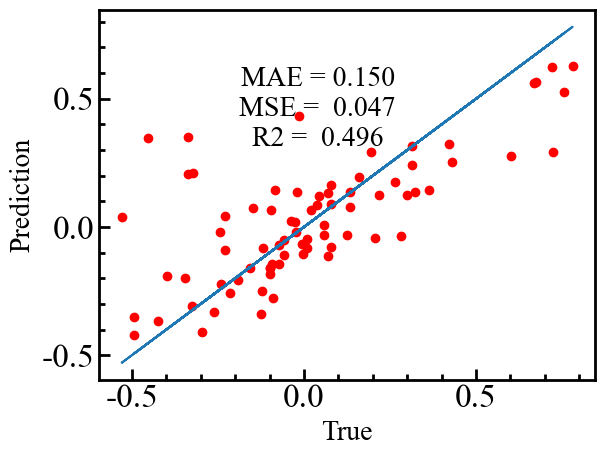

[0.54017922 0.4105992  0.37384709 0.57579858 0.37168751 0.56225357
 0.69089384 0.53189382 0.7891214  0.54363639]


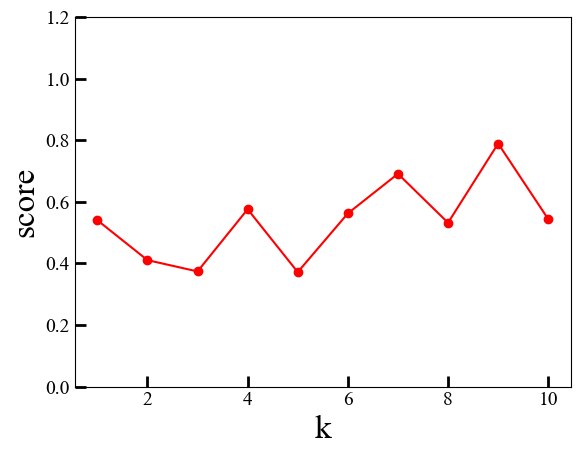

RMSE: 0.1784928574882526
MAE: 0.12992753921818911
R2: 0.7005547012675489
MSE: 0.03185970017432166


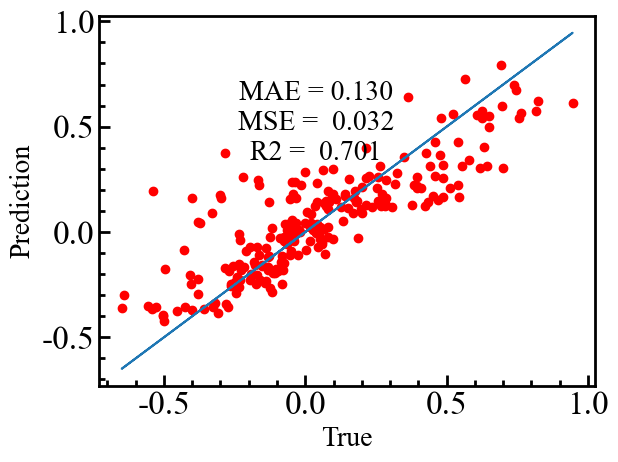

In [25]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

RMSE: 0.17505352513813727
MAE: 0.12016071255553
R2: 0.673889223244677
MSE: 0.030643736663288453


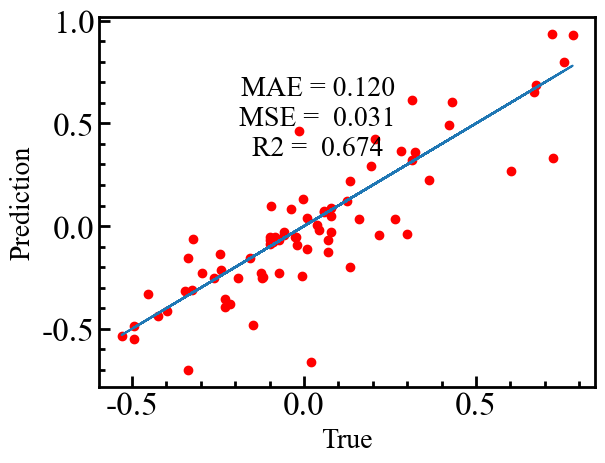

In [ ]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

In [ ]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# 目前只有 xgboost_modify

这里生成了新的预测数据集New_prediction_total.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [1]:
# 8.1.1.1 导入有机分子smiles码的csv文件
def smiles_csv(name2):
    import pandas as pd
    global data2
    data2 = pd.read_csv(name2)
    print(data2.iloc[:,0])
smiles_csv("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [2]:
# 8.1.1.2 pydel描述符生成
def pydel_featurizer():
    from padelpy import from_smiles
    import pandas as pd
    data2a = data2.iloc[:,0].map(lambda x : from_smiles(x).values())
    data2a = pd.DataFrame(data2a)
    data2b = data2a.iloc[:,0].apply(pd.Series)
    #写入列名
    data2c = data2.iloc[:,0].map(lambda x : from_smiles(x).keys())
    col2c = data2c.iloc[0]
    data2b.columns = col2c
    print(data2b)   
    # 特征存入pydel_featurizer.csv
    data2b.to_csv("pydel_featurizer_output.csv")
pydel_featurizer()

  nAcid                ALogP                ALogp2                 AMR  \
0     0   0.6420000000000001   0.41216400000000014              5.5021   
1     0   0.7890000000000001    0.6225210000000002  32.608000000000004   
2     0   1.2389999999999999    1.5351209999999997             37.2862   
3     1  0.40489999999999987    0.1639440099999999             38.5605   
4     0  -0.1853999999999998  0.034373159999999923              14.709   

                 apol naAromAtom nAromBond nAtom nHeavyAtom  nH  ...  \
0           17.654344          6         6    15          7   8  ...   
1  18.029929999999997          0         0    17          7  10  ...   
2  22.704722999999984          0         0    19          8  11  ...   
3  18.726757999999993          6         6    16         10   6  ...   
4  10.614344000000001          0         0    11          3   8  ...   

                  P1s                  P2s                 E1s  \
0  0.6459282616967016   0.3324692311280096  0.5506050917

In [3]:
# !pip install padelpy
# from padelpy import from_smiles
# import pandas as pd
# # calculate molecular descriptors for propane
# CCC_descriptors = from_smiles('CCC')
# print(CCC_descriptors)
# print(CCC_descriptors['nAcid'])
# print(CCC_descriptors['ALogP'])
# print(CCC_descriptors['ALogp2'])

### 8.1.2 rdkit描述符

In [4]:
# 8.1.2.1 导入有机分子smiles码的csv文件
def smiles_csv(name3):
    import pandas as pd
    global data3
    data3 = pd.read_csv(name3)
    print(data3.iloc[:,0])
smiles_csv("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [5]:
# 8.1.2.2 rdkit描述符生成
def rdkit_featurizer():
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem import rdDepictor
    from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
    # choose 200 molecular descriptors
    chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']
    # create molecular descriptor calculator
    mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
    data4 = data3.iloc[:,0].map(lambda x : mol_descriptor_calculator.CalcDescriptors(Chem.MolFromSmiles(x)))
    data4 = pd.DataFrame(data4)
    data5 = pd.DataFrame()
    # split to 200 columns
    for i in range(0, 200): 
        data5 = pd.concat([data5, data4.applymap(lambda x: x[i])], axis=1)
    data5.columns = chosen_descriptors
    display(data5)  
    # 特征存入rdkit_featurizer.csv
    data5.to_csv("rdkit_featurizer_output.csv")
rdkit_featurizer()


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,3.021465,129.965660,5.112884,4.386751,4.386751,3.393847,2.410684,2.410684,1.654701,1.654701,...,0,0,0,0,0,0,0,0,0,0.458806
1,2.919498,64.580271,5.535534,4.300585,4.300585,3.414214,2.282554,2.282554,1.178356,1.178356,...,0,0,0,0,0,0,0,0,0,0.524124
2,2.503881,104.954453,5.983128,5.153985,6.739982,3.787694,3.102028,4.017704,2.421242,3.597388,...,0,0,0,0,0,0,0,0,0,0.391885
3,3.152941,254.783061,7.560478,5.112077,5.112077,4.715214,2.728688,2.728688,1.822302,1.822302,...,0,0,0,0,0,0,0,0,0,0.610259
4,1.632993,0.000000,2.707107,2.707107,2.707107,1.414214,1.414214,1.414214,0.707107,0.707107,...,0,0,0,0,0,0,0,0,0,0.385471


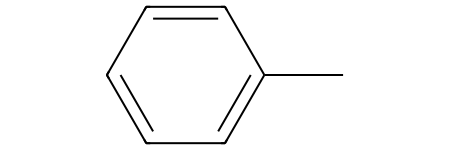

In [6]:
# 8.1.2.3 从smiles码画分子
def drawMolecule(smiles):
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem import rdDepictor
    from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
    m = Chem.MolFromSmiles(smiles)
    display(m)
drawMolecule('Cc1ccccc1') #括号里（SMILES码两边）请加引号

## 8.2 无机材料描述符 (NJmatML参考Matminer使用类独热编码方式特征化无机化学式)

In [7]:
# 8.2.1 导入含有无机材料化学式的csv
def inorganic_csv(name4):
    import pandas as pd
    global data4
    data4 = pd.read_csv(name4)
    print(data4)
inorganic_csv("Inorganic_formula.csv")

        formula
0  (Fe2AgCu2)O3
1         Fe2O3
2        CsPbI3
3          MoS2
4      CuInGaSe
5            Si
6          TiO2


In [9]:
# 8.2.2 matminer无机材料（类独热编码）描述符生成，102维
# 例如(Fe2AgCu2)O3, Fe2O3, Cs3PbI3, MoS2, CuInGaSe, Si, TiO2等
def inorganic_featurizer():
    import pandas as pd
    from matminer.featurizers.composition.element import ElementFraction
    from pymatgen.core import Composition
    ef = ElementFraction()    
    list4 = list(map(lambda x: Composition(x), data4.iloc[:,0]))
    data7 = pd.DataFrame()
    for i in range(0, len(data4.index)):
        data7 = pd.concat([data7, pd.DataFrame(ef.featurize(list4[i])).T])
    data8 = data7.reset_index()
    print(data8) 
    element_fraction_labels = ef.feature_labels()
    print(element_fraction_labels)
    # 特征存入pydel_featurizer.csv
    data8.to_csv("inorganic_featurizer_output.csv")
inorganic_featurizer()

   index    0    1    2    3    4    5    6         7    8  ...   93   94  \
0      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.375000  0.0  ...  0.0  0.0   
1      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.600000  0.0  ...  0.0  0.0   
2      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
3      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
4      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
5      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
6      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.666667  0.0  ...  0.0  0.0   

    95   96   97   98   99  100  101  102  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[7 rows x 104 columns]
['H', '